<img src ='pic/Logo_CNTT_png.png' width='100px'>

## CHƯƠNG 04: MỘT SỐ THƯ VIỆN QUAN TRỌNG TRONG KHOA HỌC DỮ LIỆU - PHẦN 3
---
* Giảng Viên: Đặng Văn Nam
* Email: dangvannam@humg.edu.vn

**NỘI DUNG BÀI HỌC:**

1. Tầm quan trọng của trực quan hóa dữ liệu
2. Giới thiệu thư viện Matplotlib
3. Một số biểu đồ cơ bản với Matplotlib
    * 3.1 Biểu đồ dạng đường (plot)
    * 3.2 Biểu đồ dạng cột (bar)
    * 3.3 Biểu đồ hình tròn (pie)
    * 3.4 Biểu đồ phân tán (scatter)

# Example:  PHÂN TÍCH  DỮ LIỆU CHUỖI THỜI GIAN (TIME SERIES DATA) BICYCLE COUNT

---
**Bài toán:**
* Người ta lắp đặt thiết bị để đếm số lượng xe đạp đi qua chiều phía đông và phía tây của cây cầu Fremont Bridge theo từng giờ.
* Chi tiết: https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k
----------------------
**Tập dữ liệu:**
* Tập dữ liệu là số lượng xe đạp đi qua cây cầu Fremont Bridge. Dữ liệu này được thu thập tự động thông qua các cảm biến ở 2 lối đi bộ ở phía đông và phía tây của cây cầu. Số lượng xe đạp được tổng hợp theo từng giờ.
* Tập dữ liệu bao gồm 4 cột:
    - Date: Thời gian (ngày - giờ): 10/03/2012 12:00:00 AM (Kiểu thời gian mm/dd/yyyy hh:mm:ss)
    - Fremont Bridge Total: Tổng số xe đi theo cả 2 lối đông và tây (Kiểu số nguyên)
    - Fremont Bridge East Sidewalk: Số xe đạp đi qua lối phía đông của cầu tương ứng với thời gian (Kiểu số nguyên)
    - Fremont Bridge West Sidewalk: Số xe đạp đi qua lối phía tây của cầu tương ứng với thời gian (Kiểu số nguyên)
-------------------------------
**Mục tiêu:**
1. Phân tích dữ liệu chuỗi thời gian (Time Series Data) sử dụng Pandas.
2. Kết hợp với các biểu đồ để tìm ra được những Insight ẩn chứa trong tập dữ liệu.

## 1) Đọc, quan sát và chuẩn hóa dữ liệu
---

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#Đọc dữ liệu trong file csv
path='Data_Excercise\Data_Bicycle_Counter.csv'
df_bicycle=pd.read_csv(path)
df_bicycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135614 entries, 0 to 135613
Data columns (total 4 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date                          135614 non-null  object 
 1   Fremont Bridge Total          135593 non-null  float64
 2   Fremont Bridge East Sidewalk  135593 non-null  float64
 3   Fremont Bridge West Sidewalk  135593 non-null  float64
dtypes: float64(3), object(1)
memory usage: 4.1+ MB


In [ ]:
df_bicycle.head(10)

In [ ]:
#Kiểm tra dữ liệu missing
df_bicycle.isnull().sum()

In [ ]:
#Liệt kê các thời điểm không có dữ liệu (Missing values)
df_bicycle[df_bicycle.isnull().any(axis=1)]

#hoặc
#df_bicycle[pd.isnull(df_bicycle['Total'])]

In [ ]:
# Đổi lại tên các cột cho ngắn gọn
df_bicycle.columns = ['Date','Total', 'East', 'West']
df_bicycle

In [ ]:
df_bicycle.info()

In [ ]:
#Chuyển đổi dữ liệu cột Date về dạng chuỗi thời gian
df_bicycle['Date'] = pd.to_datetime(df_bicycle['Date'])
df_bicycle.info()

In [ ]:
df_bicycle.head()

In [ ]:
#Thiết lập cột Date làm index cho DataFrame
df_bicycle.set_index('Date',inplace=True)
df_bicycle.head()

## Khám phá tập dữ liệu
---
### A) Sử dụng các đặc trưng thống kê

In [ ]:
#Sử dụng sum tính tổng lượt người đi xe đạp
df_bicycle.sum().bar()

In [ ]:
#Sử dụng describe để quan sát các thông số
df_bicycle.describe()

### Phát hiện 1:
----
1. Số lượng người đi xe đạp bên cầu phía West (8 344 494) cao hơn cầu phía East (6 997 333)
2. Lượng người đi qua từng bên cầu cao nhất theo giờ 850 lượt, toàn bộ 1097 lượt
3. Lượng người đi xe đạp qua cầu chủ yếu nhỏ dưới 30 lượt

### B) Phương pháp Phân tích chuỗi thời gian
---

### 1) Thống kê tổng số lượng đi xe đạp theo năm để thấy xu hướng chung

In [ ]:
df_bicycle.index

In [6]:
#Dữ liệu bắt đầu từ 3/10/2012 --> 31/08/2020 
#Tách dữ liệu chỉ lấy từ năm 2013 - 2019 cho đầy đủ dữ liệu
df_full_year = df_bicycle.loc['2013':'2020']
df_full_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 20130 to 20199
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          70 non-null     object 
 1   Fremont Bridge Total          70 non-null     float64
 2   Fremont Bridge East Sidewalk  70 non-null     float64
 3   Fremont Bridge West Sidewalk  70 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.3+ KB


In [7]:
#Tổng hợp số liệu chuỗi thời gian theo từng năm
#Tính tổng số lượt qua cầu theo năm
yearly = df_full_year.resample('Y').sum() #Tính tổng theo năm
yearly

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [4]:
#Trực quan hóa trên biểu đồ

yearly.plot(kind='line',style=[':*', '--o', '-s'], color=['red','green','blue'],figsize=(8,5))
plt.ylabel('Tổng số lượt qua cầu')
plt.xlabel('Năm')
plt.title('ĐỒ THỊ THỐNG KÊ SỐ LƯỢNG THEO NĂM')
plt.grid(True)

NameError: name 'yearly' is not defined

### Phát hiện 2:Từ biểu đồ thống kê tổng số xe đạp qua cầu theo năm ta thấy:
---
* Số lượng người đi xe đạp qua cầu Fremont có xu hướng tăng lên theo từng năm, những năm gần đây tăng nhanh.
* Lượt xe đạp qua lối đi phía tây nhiều hơn lối đi phía đông, và cũng có xu hướng tăng nhanh trong những năng gần đây.

## 2) Thống kê số lượng người đi xe đạp theo tháng để thấy xu hướng mùa vụ
---

In [ ]:
#Thống kê số lượng xe theo tháng qua phía Đông, Tây và Toàn bộ
data_month = df_bicycle.resample('M').sum() #Tính tổng lượt đi theo tháng
data_month.plot(style=['-', '-', '-'], color=['red','green','blue'],figsize=(8,5))
plt.ylabel('Số lượng xe đạp theo tháng');
plt.grid(True)
plt.show()


In [ ]:
#Hiển thị chi tiết dữ liệu theo tháng của một năm cụ thể [2019].
data_2019 = df_bicycle.loc['2017',['Total']]
df_month_19 = data_2019.resample('M').sum() #Tính tổng theo tháng
df_month_19.plot(marker='o', markersize='10', color='red',figsize=(8,5))
plt.ylabel('Tổng số lượng xe theo từng tháng')
plt.title('THỐNG KÊ TỔNG SỐ LƯỢT XE ĐẠP THEO TỪNG THÁNG TRONG NĂM 2019',loc='center')
plt.grid(True)
plt.show()

### Phát hiện 3: Từ biểu đồ thể hiện lượng xe đạp qua cầu theo tháng ta thấy:
---
* Dữ liệu chuỗi thời gian có tính thời vụ (seasonal)
* Mọi người đạp xe nhiều hơn vào các tháng mùa hè và ít hơn vào các tháng mùa đông (4 tháng có số lượng người đạp xe nhiều nhất:5, 6, 7 và 8)

--> **Dữ liệu chuỗi thời gian về lượng xe đạp qua cầu có tính xu hướng (tăng dần) và tính thời vụ (số lượng nhiều hơn vào các tháng mùa hè và ít hơn vào các tháng mùa đông)**

## 3) Thống kê lượng đi xe đạp theo giờ
---

In [ ]:
#Tính trung bình lượng xe theo từng giờ qua cầu trong toàn bộ tập dữ liệu
by_time = df_bicycle.groupby(df_bicycle.index.time).mean()
by_time

In [ ]:
#Trực quan hóa dữ liệu:
hourly_ticks = 2 * 60 * 60 * np.arange(12)
by_time.plot(xticks=hourly_ticks, style=[':*', '--s', '-o'],figsize=(12,5))
plt.grid()
plt.xlabel('Thời gian (h)')
plt.ylabel('Trung bình số xe qua cầu theo giờ')
plt.title('BIỂU ĐỒ THỂ HIỆN LƯỢNG XE TRUNG BÌNH QUA CẦU THEO TỪNG GIỜ',loc='center')
plt.show()

### Phát hiện 4: Từ biểu đồ thể hiện lượng xe đạp qua cầu trung bình theo giờ ta thấy:
---
* Lượng người đi xe đạp qua cầu chủ yếu tập trung vào thời điểm 7,8,9h buổi sáng | 16, 17, 18h buổi chiều
* Lượng người đi nhiều nhất vào thời điểm 8(h) sáng - 17h chiều.
* Thời điểm buổi sáng lượng người đi qua cầu làn phía Đông (East) Lớn hơn làn phía Tây (Đi từ bên ngoài bào trung tâm thành phố Seattle) | Buổi chiều lượng người đi qua cầu làn phía Tây (West) lơn hơn (đi ra khỏi trung tâm thành phố). 

## 4) Thống kê lượng xe trung bình theo ngày trong tuần
---

In [ ]:
#Nhóm dữ liệu theo ngày trong tuần và tính trung bình
df_weekday = df_bicycle.groupby(df_bicycle.index.dayofweek).mean()
#Đổi tên index theo ngày dễ quan sát
df_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
df_weekday

In [ ]:
#Trực quan hóa dữ liệu lên đồ thị
#stick =['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
df_weekday.plot(style=[':*', '--s', '-o'],figsize=(10,5));
plt.grid()
plt.xlabel('Thứ trong tuần')
plt.ylabel('Trung bình theo ngày trong tuần')
plt.title('LƯỢNG XE TRUNG BÌNH QUA CẦU THEO TỪNG NGÀY TRONG TUẦN',loc='center')
plt.show()

In [ ]:
#Thực hiện thống kê số lượng người đi xe đạp qua cầu
#Tách giữa ngày làm việc [thứ 2 - thứ 5] và ngày cuối tuần [thứ 7, CN]
df_weekend = np.where(df_bicycle.index.weekday < 5, 'Weekday', 'Weekend')
#Tính lượng người đi qua trung bình theo giờ giữa các ngày trong tuần và cuối tuần
df_by_time = df_bicycle.groupby([df_weekend, df_bicycle.index.time]).mean()
df_by_time

In [ ]:
#Trực quan hóa dữ liệu
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df_by_time.loc['Weekday'].plot(ax=ax[0], title='Ngày làm việc[từ Thứ 2-6]',
                           xticks=hourly_ticks, style=[':*', '--s', '-o'], grid=True, rot=45)
df_by_time.loc['Weekend'].plot(ax=ax[1], title='Ngày cuối tuần [Thứ 7, CN]',
                           xticks=hourly_ticks, style=[':*', '--s', '-o'], grid=True,rot=45);

### Phát hiện 5: Từ biểu đồ thể hiện lượng xe đạp qua cầu trung bình theo ngày trong tuần:
---
* Lượng người đi xe đạp qua cầu chủ yếu vào các ngày làm việc trong tuần [thứ 2 --> thứ 6]; Cuối tuần [Thứ 7, CN] lượng người đi qua cầu giảm đi đáng kể. Lượng người đi qua cầu ngày làm việc gấp đôi ngày cuối tuần.
* Vào các ngày làm việc trong tuần lượng người đi xe đạp qua cầu chủ yếu tập trung vào thời điểm 7,8,9h buổi sáng | 16, 17, 18h buổi chiều. Lượng người đi nhiều nhất vào thời điểm 8(h) sáng - 17h chiều.
* Vào các ngày cuối tuần, người đi xe đạp chủ yếu qua cầu trong thời gian từ 12-16h

## 2. GIỚI THIỆU THƯ VIỆN MATPLOTLIB
---

* Matplotlib là thư viện dùng để vẽ đồ thị rất mạnh mẽ, có cú pháp tương tự như Matlab.
* Hỗ trợ nhiều loại biểu đồ, đặt biệt là các loại được sử dụng trong nghiên cứu hoặc kinh tế như biểu đồng đường, cột, tần suất (histograms), tương quan, scatterplots…
* Cấu trúc của Matplotlib gồm nhiều phần, phục vụ cho các mục đích sử dụng khác nhau.
* Matplotlib miễn phí và mã nguồn mở.

## 3. MỘT SỐ DẠNG ĐỒ THỊ CƠ BẢN
---
### 3.1 Đồ thị dạng đường (plot)

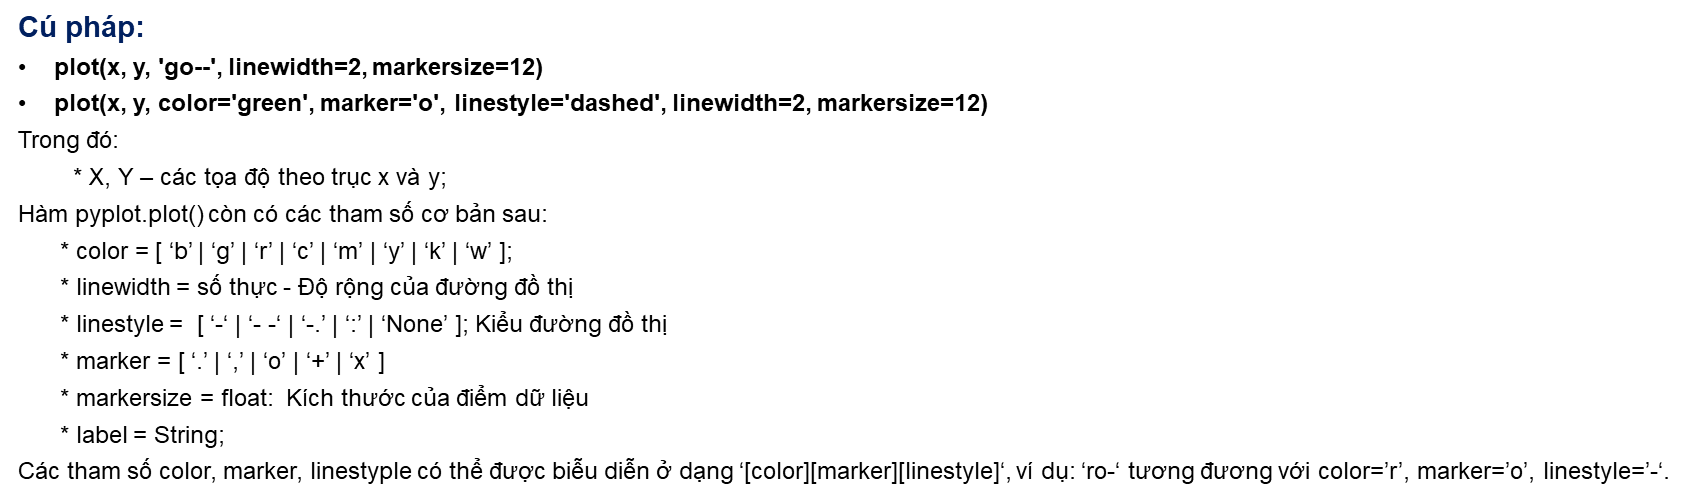

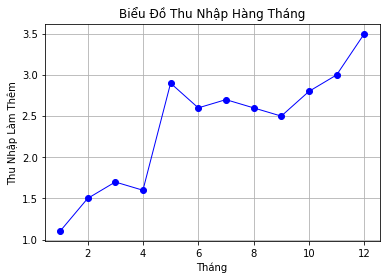

In [7]:
#import thư viện 
import matplotlib.pyplot as plt

#Khởi tạo dữ liệu
x=[1,  2,  3,   4,  5,  6,  7,  8,  9,  10, 11, 12]
y=[1.1,1.5,1.7,1.6,2.9,2.6,2.7,2.6,2.5,2.8,3.0, 3.5]

plt.plot(x,              #Dữ liệu trục x     
         y,              #Dữ liệu trục y
         color='b',      #Màu đường
         linewidth='1',  #Độ rộng đường
         marker='o',     #Kiểu điểm
         linestyle='-')  #Kiểu đường

plt.xlabel('Tháng')
plt.ylabel('Thu Nhập Làm Thêm')
plt.title('Biểu Đồ Thu Nhập Hàng Tháng')
plt.grid(True)
plt.show()

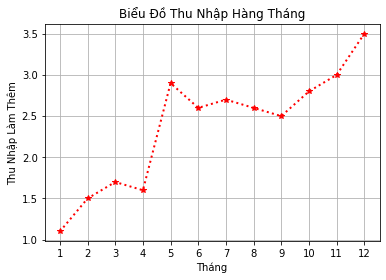

In [8]:
plt.plot(list(map(str,x)),  #Dữ liệu trục x     
         y,                 #Dữ liệu trục y
         color='red',       #Màu đường
         linewidth='2',     #Độ rộng đường
         marker='*',        #Kiểu điểm
         linestyle=':')     #Kiểu đường

plt.xlabel('Tháng')
plt.ylabel('Thu Nhập Làm Thêm')
plt.title('Biểu Đồ Thu Nhập Hàng Tháng')
plt.grid(True)
plt.show()

In [ ]:
#Khởi tạo dữ liệu
x=[1,  2,  3,   4,  5,  6,  7,  8,  9,  10, 11, 12]
y1=[1.1,1.5,1.7,1.6,2.9,2.6,2.7,2.6,2.5,2.8,3.0, 3.5]
y2=[1.2,1.3,1.8,2.0,1.9,2.6,2.5,2.8,2.2,2.7,3.2, 3.3]

#Vẽ biểu đồ dạng đường trên cùng một đồ thị
plt.plot(list(map(str,x)),y1,color='blue',linewidth='1',marker='*',linestyle='--')
plt.plot(list(map(str,x)),y2,color='red',linewidth='1',marker='s',linestyle='-')

plt.xlabel('Tháng')
plt.ylabel('Thu Nhập Làm Thêm')
plt.title('Biểu Đồ Thu Nhập Hàng Tháng')
plt.grid(True)
plt.show()

## 3.2 Đồ thị dạng hình tròn (pie)
---
**Cú pháp:**

pie(x, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)

Các tham số cơ bản:
* x: Số liệu vẽ biểu đồ hình tròn (1 mảng, 1 list)
* explode: làm nổi bật một phần nào đó trong biểu đồ (>0 tách)
* labels: Nhãn của mỗi phần trong biểu đồ


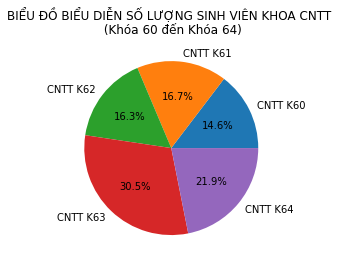

In [3]:
#Tạo dữ liệu
ds_khoa =['CNTT K60','CNTT K61','CNTT K62','CNTT K63', 'CNTT K64']
so_sv   =[350, 400, 389, 729, 523]

#Vẽ biểu đồ hình tròn
plt.pie(so_sv,
       labels=ds_khoa,
       autopct='%1.1f%%')
plt.title('BIỂU ĐỒ BIỂU DIỄN SỐ LƯỢNG SINH VIÊN KHOA CNTT \n (Khóa 60 đến Khóa 64)')
plt.show()

In [ ]:
#Vẽ biểu đồ hình tròn
plt.pie(so_sv,
       labels=ds_khoa,
        wedgeprops=dict(width=0.6),
       autopct='%1.1f%%')
plt.title('BIỂU ĐỒ BIỂU DIỄN SỐ LƯỢNG SINH VIÊN KHOA CNTT \n (Khóa 60 đến Khóa 64)')
plt.show()

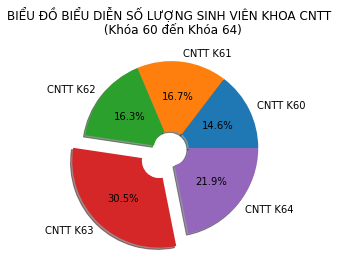

In [14]:
ex = (0, 0, 0, 0.2, 0)
plt.pie(so_sv, 
        labels = ds_khoa, 
        wedgeprops = dict(width = 0.8),
        shadow = True,
        explode = ex,
        autopct = '%1.1f%%')
plt.title('BIỂU ĐỒ BIỂU DIỄN SỐ LƯỢNG SINH VIÊN KHOA CNTT \n (Khóa 60 đến Khóa 64)')
plt.show()

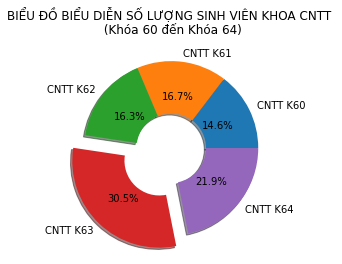

In [10]:
#Tách phần tỷ lệ lớn nhất ra khỏi vòng tròn
ex = (0, 0, 0, 0.2, 0)

#Vẽ biểu đồ hình tròn
plt.pie(so_sv,
       labels=ds_khoa,
       explode=ex,
       wedgeprops=dict(width=0.6),
       shadow=True,
       autopct='%1.1f%%')


plt.title('BIỂU ĐỒ BIỂU DIỄN SỐ LƯỢNG SINH VIÊN KHOA CNTT \n (Khóa 60 đến Khóa 64)')
plt.show()

## 3.3 Đồ thị dạng cột (Bar)
---
**Cú pháp:**
    
.bar(name, values)

Các tham số cơ bản:
* name: Tên cột
* Values: Giá trị của dữ liệu muốn vẽ đồ thị


In [ ]:
#Vẽ biểu đồ dạng cột
plt.bar(ds_khoa,
        so_sv,
        color='blue')

plt.title('BIỂU ĐỒ BIỂU DIỄN SỐ LƯỢNG SINH VIÊN KHOA CNTT \n (Khóa 60 đến Khóa 64)')
plt.ylabel('Số sinh viên')
plt.grid(True)
plt.show()

In [ ]:
#Vẽ biểu đồ dạng cột
plt.barh(ds_khoa,
        so_sv,
        color='brown')

plt.title('BIỂU ĐỒ BIỂU DIỄN SỐ LƯỢNG SINH VIÊN KHOA CNTT \n (Khóa 60 đến Khóa 64)')
plt.xlabel('Số sinh viên')
plt.grid(True)
plt.show()

## VÍ DỤ: TRỰC QUAN HÓA TẬP DỮ LIỆU DÂN SỐ
---
Tập dữ liệu countries.csv lưu trữ số liệu dân số của 142 nước và vùng lãnh thổ trên thế giới. Mỗi một quốc gia sẽ có số liệu dân số trong giai đoạn từ năm 1952 tới năm 2007 (số liệu 5 năm 1 lần)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Đọc tập dữ liệu dân số của các nước trên thế giới
data = pd.read_csv("Data_Excercise/countries.csv")
data.info()

In [ ]:
data.head(12)

In [ ]:
data['country'].unique().tolist()

In [ ]:
#Dữ liệu dân số của 142 quốc gia và vùng lãnh thổ
data['country'].value_counts()

### 1. Trực quan hóa dữ liệu dân số VIỆT NAM
---

In [ ]:
#Lọc dữ liệu Việt Nam
vn = data[data.country=='Vietnam']
vn

In [ ]:
nam = list(map(str,vn.year))
print(nam)

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)

plt.plot(nam,vn.population/10**6,'r-o')
plt.bar(nam,vn.population/10**6)
plt.title('DÂN SỐ VIỆT NAM QUA TRONG GIAI ĐOẠN 1952 - 2007')
plt.grid(True)
plt.ylabel('Số dân (Triệu người)')
plt.show()

### 2. Trực quan hóa dữ liệu dân số 4 quốc gia đông dân nhất Đông Nam Á (VN, Indonesia, Thái Lan, Philippin)
---

In [ ]:
ind = data[data.country=='Indonesia']
thd = data[data.country=='Thailand']
phi = data[data.country=='Philippines']

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(nam,vn.population/10**6,'r-o')
plt.plot(nam,ind.population/10**6,'--s')
plt.plot(nam,thd.population/10**6,':*')
plt.plot(nam,phi.population/10**6,':*')
plt.legend(['Việt Nam','Indonesia','Thái Lan','Philippin'])
plt.grid(True)
plt.show()

### 3. Tỷ lệ % dân số 8 quốc gia Đông Nam Á
---

In [ ]:
#Dân số các nước ĐNA năm 2007 
vn_2007 = data['population'].loc[(data.country=='Vietnam') & (data.year==2007)].values
tl_2007 = data['population'].loc[(data.country=='Thailand') & (data.year==2007)].values
in_2007 = data['population'].loc[(data.country=='Indonesia') & (data.year==2007)].values
ma_2007 = data['population'].loc[(data.country=='Malaysia') & (data.year==2007)].values
ph_2007 = data['population'].loc[(data.country=='Philippines') & (data.year==2007)].values
my_2007 = data['population'].loc[(data.country=='Myanmar') & (data.year==2007)].values
ca_2007 = data['population'].loc[(data.country=='Cambodia') & (data.year==2007)].values
sg_2007 = data['population'].loc[(data.country=='Singapore') & (data.year==2007)].values

In [ ]:
list_name_DNA = ['Vietnam','Thailand','Indonesia','Malaysia','Philippines','Myanmar','Cambodia','Singapore']
list_po_DAN = [int(vn_2007),int(tl_2007),int(in_2007),int(ma_2007),int(ph_2007),int(my_2007),int(ca_2007),int(sg_2007)]

In [ ]:
#Vẽ biểu đồ hình tròn
plt.pie(list_po_DAN,
       labels=list_name_DNA,
       wedgeprops=dict(width=0.6),
       autopct='%1.1f%%')
plt.title('BIỂU ĐỒ BIỂU DIỄN TỶ LỆ DÂN SỐ CÁC NƯỚC ĐÔNG NAM Á NĂM 2007')
plt.show()

## 3. Danh sách 15 nước có số dân đông nhất thế giới năm 2007
---

In [ ]:
#Lọc 15 nước có dân số cao nhất năm 2007
population2007 = data.loc[data.year==2007]
population2007.sort_values(by=['population'],ascending=False,inplace=True)
data15_2007 = population2007.iloc[:15]

In [ ]:
data15_2007

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(data15_2007.country,data15_2007.population/10**6)
plt.title('DÂN SỐ 15 NƯỚC ĐÔNG NHẤT THẾ GIỚI NĂM 2007')
plt.xlabel('Dân số (Triệu người)')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(data15_2007.country,data15_2007.population/10**6, color='cyan')
plt.title('DÂN SỐ 15 NƯỚC ĐÔNG NHẤT THẾ GIỚI NĂM 2007')
plt.xlabel('Quốc gia')
plt.ylabel('Dân số (Triệu người)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# THỰC HÀNH 
---
## Bài tập 27: Làm việc với Matplotlib
Sử dụng kết quả thống kê được ở Bài tập 20 về nhiệt độ max, min, mean của 6 thành phố:

Yêu cầu:
1. Vẽ biểu đồ dạng đường biểu diễn nhiệt độ Max của 6 thành phố
2. Vẽ biểu đồ dạng cột biểu diễn nhiệt độ Mean của 6 thành phố
4.  Vẽ biểu đồ dạng điểm biểu diễn nhiệt độ Min của 6 thành phố

*(Thiết lập các tham số để có được kết quả như hình minh họa trong slide)*


In [ ]:
#{Học viên viết code ở đây}






